# TESTING

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
from io import BytesIO

In [2]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
from io import BytesIO

# muzete pridat libovolnou zakladni knihovnu ci knihovnu predstavenou na prednaskach
# dalsi knihovny pak na dotaz

# Ukol 1: nacteni dat ze ZIP souboru
def load_data(filename: str) -> pd.DataFrame:
    """
    Function that parses data about crashes from zips

    :param filename: path to file containing data about crashes
    :return: pandas DataFrame containing data loaded data about crashes
    """


    # tyto konstanty nemente, pomuzou vam pri nacitani
    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
               "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27",
               "p28",
               "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
               "p57", "p58", "a", "b", "d", "e", "f", "g", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t",
               "p5a"]

    # def get_dataframe(filename: str, verbose: bool = False) -> pd.DataFrame:
    regions = {
        "PHA": "00",
        "STC": "01",
        "JHC": "02",
        "PLK": "03",
        "ULK": "04",
        "HKK": "05",
        "JHM": "06",
        "MSK": "07",
        "OLK": "14",
        "ZLK": "15",
        "VYS": "16",
        "PAK": "17",
        "LBK": "18",
        "KVK": "19",
    }

    year_zips = [] # TODO DELETE
    global df
    df = pd.DataFrame()
    with zipfile.ZipFile(filename, "r") as zfile:
        for name in zfile.namelist():
            print(f"Handling \"{name}\" ...") # TODO DELETE
            year_zips.append(name) # TODO DELETE
            zfiledata = BytesIO(zfile.read(name))
            with zipfile.ZipFile(zfiledata) as nested_zip:
                for csv in nested_zip.namelist():
                    # read one csv from one inner zip
                    csvfiles = BytesIO(nested_zip.read(csv))
                    current_region_code = csv.split('.')[0]
                    print(f"Zpracovavany kraj: {current_region_code}") # TODO DELETE
                    for region_abr, region_code in regions.items():
                        if region_code == current_region_code:
                            print(region_abr)
                            dfs = pd.read_csv(csvfiles, encoding="cp1250", sep=";", names=headers, low_memory=False)
                            dfs['region'] = region_abr
                            df = pd.concat([df, dfs], ignore_index=True)


    print("FINAL INFO") # TODO DELETE
    print(year_zips) # TODO DELETE
    print(df.info()) # TODO DELETE
    print(df['region']) # TODO DELETE
    return df


df = load_data("data/data.zip")


Handling "2016.zip" ...
Zpracovavany kraj: 00
PHA
Zpracovavany kraj: 01
STC
Zpracovavany kraj: 02
JHC
Zpracovavany kraj: 03
PLK
Zpracovavany kraj: 04
ULK
Zpracovavany kraj: 05
HKK
Zpracovavany kraj: 06
JHM
Zpracovavany kraj: 07
MSK
Zpracovavany kraj: 08
Zpracovavany kraj: 09
Zpracovavany kraj: 10
Zpracovavany kraj: 11
Zpracovavany kraj: 12
Zpracovavany kraj: 13
Zpracovavany kraj: 14
OLK
Zpracovavany kraj: 15
ZLK
Zpracovavany kraj: 16
VYS
Zpracovavany kraj: 17
PAK
Zpracovavany kraj: 18
LBK
Zpracovavany kraj: 19
KVK
Zpracovavany kraj: CHODCI
Handling "2017.zip" ...
Zpracovavany kraj: 00
PHA
Zpracovavany kraj: 01
STC
Zpracovavany kraj: 02
JHC
Zpracovavany kraj: 03
PLK
Zpracovavany kraj: 04
ULK
Zpracovavany kraj: 05
HKK
Zpracovavany kraj: 06
JHM
Zpracovavany kraj: 07
MSK
Zpracovavany kraj: 08
Zpracovavany kraj: 09
Zpracovavany kraj: 10
Zpracovavany kraj: 11
Zpracovavany kraj: 12
Zpracovavany kraj: 13
Zpracovavany kraj: 14
OLK
Zpracovavany kraj: 15
ZLK
Zpracovavany kraj: 16
VYS
Zpracovavany

In [3]:
# Ukol 2: zpracovani dat
def parse_data(df: pd.DataFrame, verbose: bool = False) -> pd.DataFrame:
    """
    Function that purifies data

    :param df: pandas DataFrame with the data about crashes
    :param verbose: Bool stating if user wants to show original and new data size
    :return: pandas DataFrame with altered data about crashes
    """

    print("START 2. FUNKCE") # TODO DELETE
    df2 = df.copy()
    if verbose:
        size = np.sum(df2.memory_usage(index=False, deep=True))
        print("orig_size={:.1f} MB".format(size / 1_000_000))
    #df2['date'] = df2['p2a'].astype('datetime64[D]')
    df2['date'] = pd.to_datetime(df2['p2a'])

    headers = ["p1", "p36", "p37", "p2a", "weekday(p2a)", "p2b", "p6", "p7", "p8", "p9", "p10", "p11", "p12", "p13a",
               "p13b", "p13c", "p14", "p15", "p16", "p17", "p18", "p19", "p20", "p21", "p22", "p23", "p24", "p27",
               "p28",
               "p34", "p35", "p39", "p44", "p45a", "p47", "p48a", "p49", "p50a", "p50b", "p51", "p52", "p53", "p55a",
               "p57", "p58", "h", "i", "j", "k", "l", "n", "o", "p", "q", "r", "s", "t",
               "p5a"]

    df2[headers] = df2[headers].astype('category')

    df2['a'] = [str(x).replace(',', '.') for x in df2['a']]
    df2['b'] = [str(x).replace(',', '.') for x in df2['b']]
    df2['d'] = [str(x).replace(',', '.') for x in df2['d']]
    df2['e'] = [str(x).replace(',', '.') for x in df2['e']]
    df2['f'] = [str(x).replace(',', '.') for x in df2['f']]
    df2['g'] = [str(x).replace(',', '.') for x in df2['g']]

    # This "nicer" solution takes circa 52 s
    # cols_to_float = ['a', 'b', 'd', 'e', 'f', 'g']
    # df2[cols_to_float] = df2[cols_to_float].apply(pd.to_numeric, errors='coerce', axis=1)

    # But this "longer" solution takes only 14 s
    df2['a'] = pd.to_numeric(df2['a'], errors="coerce")
    df2['b'] = pd.to_numeric(df2['b'], errors="coerce")
    df2['d'] = pd.to_numeric(df2['d'], errors="coerce")
    df2['e'] = pd.to_numeric(df2['e'], errors="coerce")
    df2['f'] = pd.to_numeric(df2['f'], errors="coerce")
    df2['g'] = pd.to_numeric(df2['g'], errors="coerce")

    print('INFO PRED ODSTRANENIM DUPLIKATU Z p1') # TODO DELETE
    print(len(df2.index))  # TODO DELETE

    print('INFO PO ODSTRANENI DUPLIKATU Z p1') # TODO DELETE
    df2 = df2.drop_duplicates(subset=['p1'])  # TODO DELETE
    print(len(df2.index)) # TODO DELETE
    if verbose:
        size = np.sum(df2.memory_usage(index=False, deep=True))
        print("new_size={:.1f} MB".format(size / 1_000_000))

    return df2


df2 = parse_data(df, True)

START 2. FUNKCE
orig_size=941.4 MB
INFO PRED ODSTRANENIM DUPLIKATU Z p1
609150
INFO PO ODSTRANENI DUPLIKATU Z p1
609146
new_size=168.8 MB


<class 'seaborn.axisgrid.FacetGrid'>


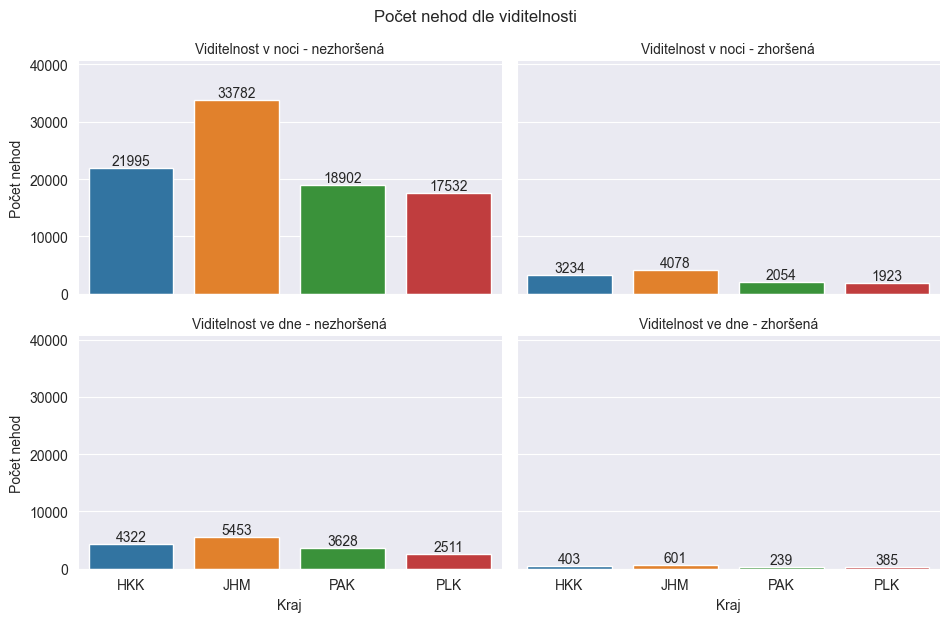

In [4]:
# Ukol 3: počty nehod v jednotlivých regionech podle viditelnosti
def plot_visibility(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):
    """
    Function that plots graphs showing crashes in some regions depending on visibility

    :param df: pandas DataFrame with the data about crashes
    :param fig_location: path for saving generated graphs
    :param show_figure: Bool stating if user wants to show generated graph
    :return: nothing (shows or saves the plot)
    """

    regions_to_plot = ['PAK', 'HKK', 'JHM', 'PLK']
    # visibility_titles = {1 :'Viditelnost v noci - nezhoršená',
    #                       3: 'Viditelnost v noci - zhoršená',
    #                       6: 'Viditelnost ve dne - nezhoršená',
    #                       7: 'Viditelnost ve dne - zhoršená'}
    visibility_titles = {1 :'Viditelnost v noci - nezhoršená',
                          2: 'Viditelnost v noci - zhoršená',
                          3: 'Viditelnost v noci - zhoršená',
                          4 :'Viditelnost v noci - nezhoršená',
                          5: 'Viditelnost v noci - zhoršená',
                          6: 'Viditelnost ve dne - nezhoršená',
                          7: 'Viditelnost ve dne - zhoršená'}

    road_labels = ["žádná z uvedených",
                    "dvoupruhová",
                    "třípruhová",
                    "čtyřpruhová s dělícím pásem",
                    "čtyřpruhová s dělící čarou",
                    "vícepruhová",
                    "rychlostní komunikace"]

    wanted_visibility_types = [1, 3, 6, 7]

    df2['p21'] = df2['p21'].astype(int)
    # try: # TODO DELETE TRY AFTERWARDS
    #     df2['p21'] = df2['p21'].astype(int)
    # except Exception:# TODO DELETE TRY AFTERWARDS
    #     pass# TODO DELETE TRY AFTERWARDS

    for i in range(0, 7):
        df2.loc[df2['p21'] == i, "p21"] = road_labels[i]

    data_to_plot = df2.copy()
    data_to_plot = data_to_plot.replace({'p19' : visibility_titles})
    data_to_plot = data_to_plot.groupby(['region', 'p19']).agg({'p21': 'count'}).reset_index()
    # Choose only selected regions
    data_to_plot = data_to_plot[data_to_plot['region'].isin(regions_to_plot)]
    # Generate graphs
    sns.set_style("darkgrid")

    graphs = sns.catplot(data = data_to_plot,
                         x = 'region',
                         y = 'p21',
                         col = 'p19',
                         col_wrap = 2,
                         kind = "bar",
                         height = 3,
                         aspect = 1.6,
                         )


    graphs.set_xlabels("Kraj")
    graphs.set_ylabels("Počet nehod")
    graphs.set_titles("{col_name}")

    plt.suptitle("Počet nehod dle viditelnosti", y = 1.03)

    # iterate through axes
    for ax in graphs.axes.ravel():

        # add annotations
        for c in ax.containers:
            labels = [int((v.get_height())) for v in c]
            ax.bar_label(c, labels=labels, label_type='edge')
        ax.margins(y=0.2)

    print(type(graphs))

    if fig_location:
        plt.savefig(fig_location, dpi = 100)
    if show_figure:
        plt.show()
    plt.close()


plot_visibility(df2, "01_visibility.png", show_figure=True)

    region      p7  date   p1
0      HKK     NaN     1    0
1      HKK     NaN     2    0
2      HKK     NaN     3    0
3      HKK     NaN     4    0
4      HKK     NaN     5    0
..     ...     ...   ...  ...
235    PLK  zezadu     8  177
236    PLK  zezadu     9  185
237    PLK  zezadu    10  156
238    PLK  zezadu    11  130
239    PLK  zezadu    12  124

[240 rows x 4 columns]
Index(['čelní', 'boční', 'zezadu'], dtype='object')


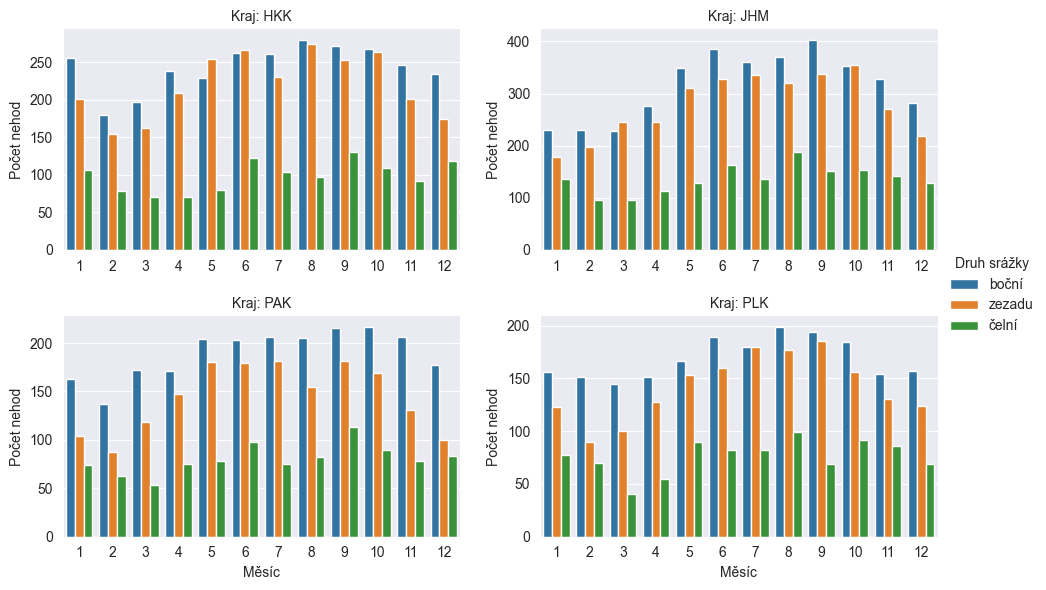

In [7]:
# Ukol4: druh srážky jedoucích vozidel
def plot_direction(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):
    """
    Function that plots graphs showing types of crashes in some regions

    :param df: pandas DataFrame with the data about crashes
    :param fig_location: path for saving generated graphs
    :param show_figure: Bool stating if user wants to show generated graph
    :return: nothing (shows or saves the plot)
    """

    regions_to_plot = ['PAK', 'HKK', 'JHM', 'PLK']
    wanted_crash_types = [1, 2, 4]
    # crash_type_titles = {1 :'čelní',
    #                       2: 'boční',
    #                       3: 'z boku',
    #                       4: 'zezadu'}
    # crash_type_order = ['boční', 'zezadu', 'z boku', 'čelní']

    crash_type_titles = {1 :'čelní',
                         2: 'boční',
                         4: 'zezadu'}
    crash_type_order = ['boční', 'zezadu', 'čelní']

    data_to_plot = df2.copy()
    data_to_plot = data_to_plot[data_to_plot['region'].isin(regions_to_plot)
                                & data_to_plot['p7'].isin(wanted_crash_types)]

    data_to_plot = data_to_plot.groupby(['region', 'p7', data_to_plot.date.dt.month]).agg({'p1': 'count'}).reset_index()

    data_to_plot = data_to_plot.replace({'p7' : crash_type_titles})
    # p7cat = data_to_plot['p7'].cat.remove_categories([0])
    p7cat = data_to_plot['p7'].cat.remove_categories([0,3])
    data_to_plot['p7'] = p7cat
    print(data_to_plot) # TODO DELETE
    print(data_to_plot['p7'].cat.categories) # TODO DELETE

    sns.set_style("darkgrid")
    graphs = sns.catplot(data = data_to_plot,
                         x = 'date',
                         y = 'p1',
                         col = 'region',
                         col_wrap = 2,
                         kind = "bar",
                         legend = True,
                         legend_out = True,
                         sharex = False,
                         sharey = False,
                         hue = 'p7',
                         hue_order = crash_type_order,
                         height = 3,
                         aspect = 1.6,
                         )

    graphs.fig.subplots_adjust(hspace = 0.3, wspace = 0.2)
    graphs.set_xlabels("Měsíc")
    graphs.set_titles("Kraj: {col_name}")
    graphs.legend.set(title="Druh srážky")
    graphs.set(ylabel="Počet nehod")

    if fig_location:
        plt.savefig(fig_location, dpi = 100)
    if show_figure:
        plt.show()
    plt.close()


plot_direction(df2, "02_direction.png", True)

['region', 'year', 'month', None]
                                 Počet nehod    datecol
region year month                                      
HKK    2016 1     Lehké zranění           92 2016-01-01
                  Těžké zranění            8 2016-01-01
                  Usmrcení                 1 2016-01-01
            2     Lehké zranění           64 2016-02-01
                  Těžké zranění           11 2016-02-01
...                                      ...        ...
PLK    2021 11    Těžké zranění            5 2021-11-01
                  Usmrcení                 3 2021-11-01
            12    Lehké zranění          105 2021-12-01
                  Těžké zranění            5 2021-12-01
                  Usmrcení                 4 2021-12-01

[864 rows x 2 columns]


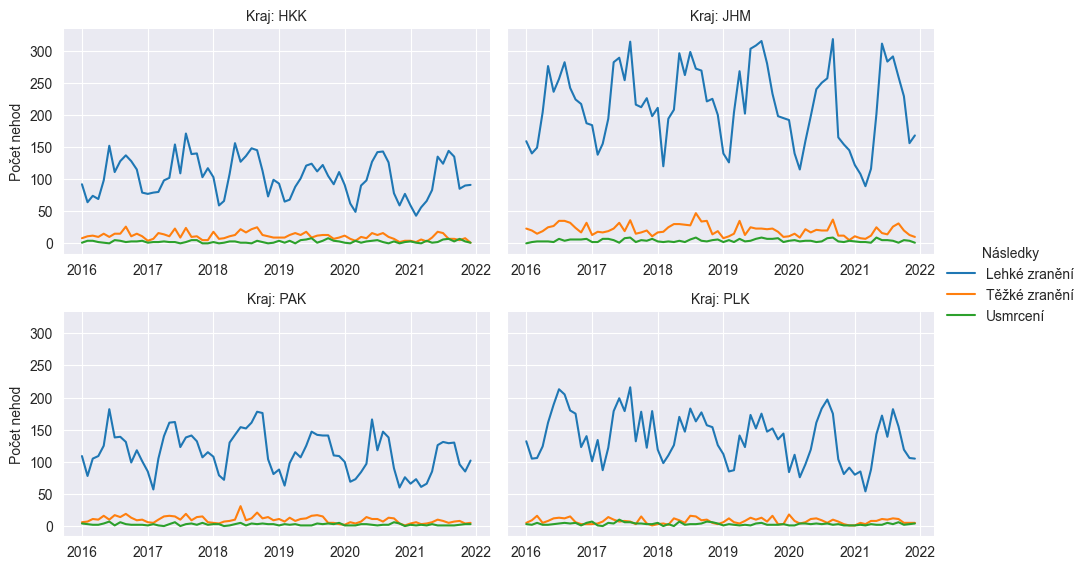

In [6]:
# Ukol 5: Následky v čase
def plot_consequences(df: pd.DataFrame, fig_location: str = None, show_figure: bool = False):
    """
    Function that plots graphs showing crashes aftermath through years

    :param df: pandas DataFrame with the data about crashes
    :param fig_location: path for saving generated graphs
    :param show_figure: Bool stating if user wants to show generated graph
    :return: nothing (shows or saves the plot)
    """
    regions_to_plot = ['PAK', 'HKK', 'JHM', 'PLK']

    data_to_plot = df2.copy()
    data_to_plot = data_to_plot[data_to_plot['region'].isin(regions_to_plot)]

    for p13_type in ['a', 'b', 'c']:
        data_to_plot[f"p13{p13_type}"] = data_to_plot[f"p13{p13_type}"].astype(int)
    data_to_plot.rename(columns={"p13a": "Usmrcení", "p13b": "Těžké zranění", "p13c": "Lehké zranění"}, inplace=True)
    data_to_plot = (data_to_plot.groupby(['region', 'date']).agg({'Usmrcení': 'sum', 'Těžké zranění': 'sum', 'Lehké zranění': 'sum', 'p1': 'count'}).reset_index())
    # print(data_to_plot[])
    #data_to_plot = data_to_plot[i].resample("M").sum()

    data_to_plot = pd.pivot_table(data_to_plot, values=["Usmrcení", "Těžké zranění", "Lehké zranění"], index=["region", "date"], aggfunc="sum")
    # data_to_plot = data_to_plot.groupby(pd.Grouper(key='date', freq="MS")).sum()
    #print(data_to_plot.index)
    #data_to_plot = data_to_plot.groupby(['region']).resample('MS', on='date').sum()
    # target = data_to_plot.unstack(level="region")

    data_to_plot = data_to_plot.groupby([data_to_plot.index.get_level_values('region'), data_to_plot.index.get_level_values('date').year,
                                        data_to_plot.index.get_level_values('date').month]).sum()
    data_to_plot = data_to_plot.stack().to_frame()
    data_to_plot.columns = ["Počet nehod"]
    data_to_plot['datecol'] = pd.to_datetime(data_to_plot.index.get_level_values(1).astype(str) + "/" + data_to_plot.index.get_level_values(2).astype(str) + "/01")
    data_to_plot.index.names = ['region', 'year', 'month', None]
    print(data_to_plot.index.names)  # TODO DELETE
    # data_to_plot = data_to_plot.resample('MS', on='date').sum()
    print(data_to_plot) # TODO DELETE

    #print(data_to_plot["Počet nehod"])
    # print(data_to_plot.index)
    # print(data_to_plot['p13a'])
    # print(data_to_plot['p13b'])
    # print(data_to_plot['p13c'])
    # print(data_to_plot['p1'])

    #print(data_to_plot.columns)
    # print(target)

    sns.set_style("darkgrid")
    graphs = sns.relplot(data = data_to_plot,
                        x = "datecol",
                        y = "Počet nehod",
                        kind = "line",
                        col = data_to_plot.index.get_level_values('region'),
                        col_wrap = 2,
                        height = 3,
                        aspect = 1.6,
                        facet_kws={"sharex": False},
                        hue = data_to_plot.index.get_level_values(3)
                    )
    # graphs = sns.relplot(data = data_to_plot,
    #                     x = "date",
    #                     y = "Počet nehod",
    #                     kind = "line",
    #                     col = 'region',
    #                     col_wrap = 2,
    #                     height = 3,
    #                     aspect = 1.6,
    #                     #hue = ["p13a", "p13b", "p13c"]
    #                 )

    graphs.set_ylabels("Počet nehod")
    graphs.set_xlabels("")
    graphs.set_titles("Kraj: {col_name}")
    graphs.legend.set(title="Následky")

    if fig_location:
        plt.savefig(fig_location, dpi = 100)
    if show_figure:
        plt.show()
    plt.close()

plot_consequences(df2, "03_consequences.png", show_figure=True)